# Listas Enlazadas


### Mauricio Oyarzún Silva, Estructura de Datos, 2020-01

## ¿Qué es una lista enlazada?

Una lista enlazada es un arreglo de tipo lineal, que está formado por *nodos* (elementos), cuyo crecimiento es dinámico (va creciendo a medida que es necesario). Dependiendo de su estructura y la cantidad de enlaces que tiene, podemos clasificar a las listas enlazadas en:

- Lista enlazada simple
- Lista doblemente enlazada
- Lista circular

Para manejar de manera sencilla una lista se usa un nodo sin valor, llamado **nodo centinela**. Este nodo facilita algunas tareas como la inserción y la eliminación. Existen dos maneras de implementar esta nodo centinela:

- Listas enlazadas con el nodo centinela dentro de la lista
- Listas enlazadas con el nodo centinela fuera de la lista

## Lista enlazada simple

Una lista enlazada simple es aquella donde cada nodo de la lista guarda una referencia solo hacia el siguiente elemento.

**Ventajas:**

- Es sencilla de implementar.
- Es eficiente en espacio.
- La inserción al inicio de la lista es $O(1)$ (tiempo constante).

**Desventajas:**

- La eliminación es $O(n)$ (lineal a la cantidad de elementos).
- La inserción al final o en una posición cualquiera es $O(n)$.

### Lista enlazada simple con el nodo centinela dentro de la lista

Decimos que una lista enlazada tiene el nodo centinela dentro de la lista, cuando se utiliza la misma `clase nodo` para generar un *nodo* al inicio que no será utilizado para guardar datos, solo se utliza con fines algorítmicos para facilitar el manejo de la lista.

En la figura podemos ver la `clase nodo`, la cual contiene un dato y una referencia a un nuevo *nodo*, esta referencia a si mismo, convierte a la lista enlazada en una estructura de caracter recursiva. Además podemos ver diferentes instancias de la `clase nodo` y como estas se ordenan para formar una lista.

In [1]:
import iplantuml

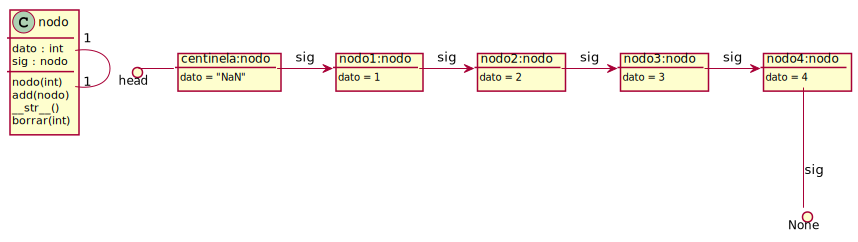

In [35]:
%%plantuml

@startuml 
class nodo{
    dato : int
    sig : nodo
    
    nodo(int)
    add(nodo)
    __str__()
    borrar(int)
}

nodo "1" - "1" nodo

object "centinela:nodo" as o0
o0 : dato = "NaN"
object "nodo1:nodo" as o1
o1 : dato = 1
object "nodo2:nodo" as o2
o2 : dato = 2
object "nodo3:nodo" as o3
o3 : dato = 3
object "nodo4:nodo" as o4
o4 : dato = 4

head ()- o0
o0 -> o1:sig
o1 -> o2:sig
o2 -> o3:sig
o3 -> o4:sig
o4 --() None : sig

@enduml

#### Ejemplo de clase nodo para una lista enlazada simple en Python

In [4]:
class nodo:
    def __init__(self, dato):
        self.dato = dato
        self.sig = None
        
    def add(self, nuevo):
        nuevo.sig = self.sig # para que no se pierda el resto de la lista
        self.sig = nuevo
    
    def __str__(self):
        if(self.sig == None):
            return "({})->(None)".format(self.dato)
        
        return "({0})->{1}".format(self.dato, str(self.sig))
    
    def borrar(self, elem):
        if(self.sig == None):
            return None
        
        if(self.sig.dato == elem):
            self.sig = self.sig.sig
            return 1
        else:
            return self.sig.borrar(elem)
        


#### Ejemplo de uso de la clase nodo de una lista enlazada simple

In [5]:
# construcción y llenado de la lista
head = nodo("centinela")
head.add(nodo("d1"))
head.add(nodo("d2"))
head.add(nodo("d3"))
head.add(nodo("d4"))
head.add(nodo("d5"))
head.add(nodo("d6"))

# uso del método sobrecargado str() y el borrado
print(str(head))
head.borrar("d4")
print(str(head))


(centinela)->(d6)->(d5)->(d4)->(d3)->(d2)->(d1)->(None)
(centinela)->(d6)->(d5)->(d3)->(d2)->(d1)->(None)


### Lista enlazada simple con el nodo centinela fuera de la lista

Cuando hablamos de una lista enlazada simple con el *nodo* centinela fuera de la lista, nos referimos a una estrucutra donde el *nodo centinela* es de una clase distinta a la `clase nodo`. En este caso implementamos una `clase lista_enlazada` que en su forma más rudimentaria guarda tres referencias, una al inicio de la lista (*first*), una al final de la lista (*last*) y una referencia auxiliar que se utiliza como referencia movil dentro de la lista (*curr*). Opcionalmente se pueden agregar parámetros, como por ejemplo, la cantidad de elementos en la lista, que nos otorgan mayor comodidad al momento de realizar ciertas verificaciones.

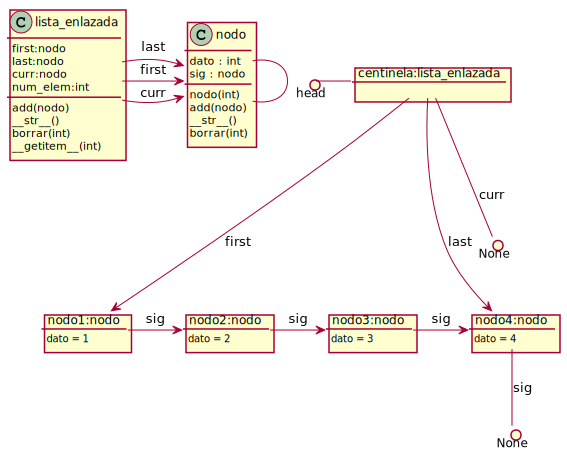

In [6]:
%%plantuml

@startuml 
class lista_enlazada{
    first:nodo
    last:nodo
    curr:nodo
    num_elem:int
    
    add(nodo)
    __str__()
    borrar(int)
    __getitem__(int)
}
class nodo{
    dato : int
    sig : nodo
    
    nodo(int)
    add(nodo)
    __str__()
    borrar(int)
}

nodo -- nodo
lista_enlazada -> nodo: first
lista_enlazada -> nodo: last
lista_enlazada -> nodo: curr

object "centinela:lista_enlazada" as o0
object "nodo1:nodo" as o1
o1 : dato = 1
object "nodo2:nodo" as o2
o2 : dato = 2
object "nodo3:nodo" as o3
o3 : dato = 3
object "nodo4:nodo" as o4
o4 : dato = 4

head ()- o0
o0 ---> o1:first
o0 ---> o4:last
o0 --() None :curr
o1 -> o2:sig
o2 -> o3:sig
o3 -> o4:sig
o4 --() None : sig

@enduml

#### Ejemplo de la clase lista\_enlazada implementando el nodo centinela fuera de la lista en Python

In [7]:
class lista_enlazada:
    def __init__(self):
        self.first = None # siempre la referencia al primero
        self.last = None # siempre la referencia al ultimo
        self.curr = None # a partir de esta referencia moverse en la lista
        self.num_elem = 0 # cantidad de elementos en la lista
        
    def add(self, nuevo):
        if(self.first == None):
            self.first = nuevo
            self.last = nuevo
        else:
            #hacer que el ultimo apunte a este nuevo nodo
            self.last.sig = nuevo
        
            #hacer que la referencia last apunte al nuevo nodo
            self.last = nuevo
        self.num_elem += 1
        
    def __str__(self):
        # recorrer e imprimir
        return str(self.first)
        
    def borrar(self, elem):
        if self.first.borrar(elem) == None:
            return None
        else:
            self.num_elem -= 1
            return 1
    
    # ejemplo de uso de la referencia curr sobrecargando []
    def __getitem__(self, index):
        if(type(index) != type(int())): raise TypeError("Index must be integer.")
        if(index > self.num_elem): raise ValueError("Index out of range.")
        if(index < 0): raise ValueError("Index must be positive or zero.")
        
        self.curr = self.first
        curr_idx = 0
        while(curr_idx != index):
            curr_idx += 1
            self.curr = self.curr.sig
            
        return self.curr.dato
        
        
        

#### Ejemplo de uso de clase lista\_enlazada en Python

In [8]:
# construcción y llenado de la lista
head = lista_enlazada()
head.add(nodo("d1"))
head.add(nodo("d2"))
head.add(nodo("d3"))
head.add(nodo("d4"))
head.add(nodo("d5"))
head.add(nodo("d6"))

# uso del método sobrecargado str() y el borrado
print(str(head))
head.borrar("d4")
print(str(head))

# uso del método sobrecargado []
print(head[2])
#testeando casos de borde
#print(head[5]) # fuera de rango
#print(head[-1]) # índice inválido
#print(head['a']) # índice no numérico

(d1)->(d2)->(d3)->(d4)->(d5)->(d6)->(None)
(d1)->(d2)->(d3)->(d5)->(d6)->(None)
d3


## Listas Doblemente Enlazadas y Listas Circulares

Una lista doblemente enlazada es aquella en el que cada nodo tiene una refencia no solo al siguiente elemento, sino también al anterior. Esto le otorga a la lista una gran flexibilidad, pues nos permite no solo avanzar sino tambien retroceder dentro de la lista (es bidireccional) para lo cual debemos pagar un costo en espacio (tenemos una referencia mas por nodo).
Cuando hablamos de una lista doblemente enlazada con el *nodo* centinela fuera de la lista, nos referimos a una estrutura donde el *nodo centinela* es de una clase distinta a la `clase nodo`. Para este nuevo tipo de lista la `clase nodo` es implementada agregando una segunda referencia recursiva (*ant*), a este nuevo nodo lo denominaremos `clase nodo2e`. La implementación de la `clase lista_enlazada2e` es análoga a la clase centinela implementada anteriormente la cual contaba con: una referencia al inicio de la lista (*first*), una referencia al final de la lista (*last*) y una referencia auxiliar que se utiliza como referencia movil dentro de la lista (*curr*). 

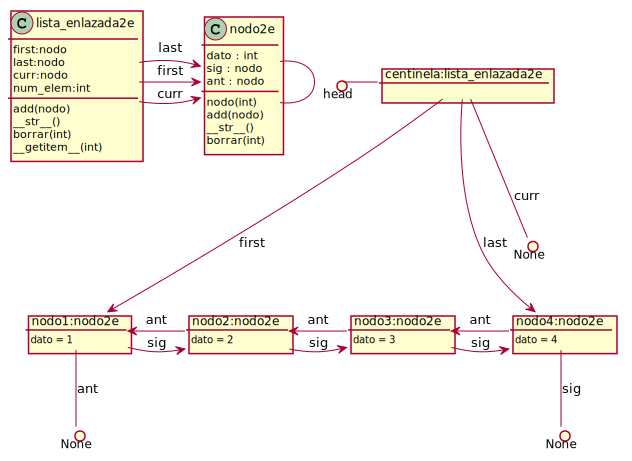

In [14]:
%%plantuml

@startuml 
class lista_enlazada2e{
    first:nodo
    last:nodo
    curr:nodo
    num_elem:int
    
    add(nodo)
    __str__()
    borrar(int)
    __getitem__(int)
}
class nodo2e{
    dato : int
    sig : nodo
    ant : nodo
    
    nodo(int)
    add(nodo)
    __str__()
    borrar(int)
}

nodo2e -- nodo2e
lista_enlazada2e -> nodo2e: first
lista_enlazada2e -> nodo2e: last
lista_enlazada2e -> nodo2e: curr

object "centinela:lista_enlazada2e" as o0
object "nodo1:nodo2e" as o1
o1 : dato = 1
object "nodo2:nodo2e" as o2
o2 : dato = 2
object "nodo3:nodo2e" as o3
o3 : dato = 3
object "nodo4:nodo2e" as o4
o4 : dato = 4

head ()- o0
o0 ---> o1:first
o0 ---> o4:last
o0 --() None :curr
o1 -> o2:sig
o2 -> o1:ant
o2 -> o3:sig
o3 -> o2:ant
o3 -> o4:sig
o4 -> o3:ant
o1 --() None : ant
o4 --() None : sig

@enduml

#### Ejemplo de clase nodo con dos referencias o enlaces (nodo2e) en Python

In [25]:
class nodo2e:
    def __init__(self, dato):
        self.dato = dato
        self.sig = None
        self.ant = None
        
    def add(self, nuevo):
        pass
    
    def __str__(self):
        if(self.sig == None):
            return "({})->(None)".format(self.dato)
        
        return "({0})->{1}".format(self.dato, str(self.sig))
    
    def borrar(self, elem):  
        if(self.dato == elem):
            if(self.ant != None):
                self.ant.sig = self.sig
            if(self.sig != None):
                self.sig.ant = self.ant
            return True
        else:
            if(self.sig == None):
                return None
            else:
                return self.sig.borrar(elem)
        

        
        

#### Ejemplo de clase para una lista doblemente enlazada ( lista\_enlazada2e) en Python

In [26]:
class lista_enlazada2e:
    def __init__(self):
        self.first = None # siempre la referencia al primero
        self.last = None # siempre la referencia al ultimo
        self.curr = None # a partir de esta referencia moverse en la lista
        self.num_elem = 0 # cantidad de elementos en la lista
        
    def add(self, nuevo):
        if(self.first == None):
            self.first = nuevo
            self.last = nuevo
        else:
            #hacer que el ultimo apunte a este nuevo nodo
            self.last.sig = nuevo
            self.last.sig.ant = self.last
        
            #hacer que la referencia last apunte al nuevo nodo
            self.last = nuevo
        self.num_elem += 1
        
    def __str__(self):
        # recorrer e imprimir
        return str(self.first)
        
    def borrar(self, elem):
        if self.first.borrar(elem) == None:
            return None
        else:
            self.num_elem -= 1
            return 1
    
    # ejemplo de uso de la referencia curr sobrecargando []
    def __getitem__(self, index):
        if(type(index) != type(int())): raise TypeError("Index must be integer.")
        if(index > self.num_elem): raise ValueError("Index out of range.")
        if(index < 0): raise ValueError("Index must be positive or zero.")
        
        self.curr = self.first
        curr_idx = 0
        while(curr_idx != index):
            curr_idx += 1
            self.curr = self.curr.sig
            
        return self.curr.dato

#### Ejemplo de uso de la lista doblemente enlazada.

In [27]:
# construcción y llenado de la lista
head = lista_enlazada2e()
head.add(nodo2e("d1"))
head.add(nodo2e("d2"))
head.add(nodo2e("d3"))
head.add(nodo2e("d4"))
head.add(nodo2e("d5"))
head.add(nodo2e("d6"))

# uso del método sobrecargado str() y el borrado
print(str(head))
head.borrar("d4")
print(str(head))

head.borrar("d6")
print(str(head))

head.borrar("d1")
print(str(head))

(d1)->(d2)->(d3)->(d4)->(d5)->(d6)->(None)
(d1)->(d2)->(d3)->(d5)->(d6)->(None)
(d1)->(d2)->(d3)->(d5)->(None)
(d1)->(d2)->(d3)->(d5)->(None)


### Lista Circular

Una lista circular es aquella cuya principal características es no tener enlaces/referencias vacias o nulas. esta lista puede ser tanto simple como doblemente enlazada y para evitar los enlaces/referencias nulas, la referencia *sig* del último elemento apuntará al primero (en el caso de una lista enlazada simple), formandose una cadena de referencias "circulares". En el caso de una lista doblemente enlazada, debemos además tener la precaución que la referencia *ant* del primer elemento, apunte al último elemento de la lista.

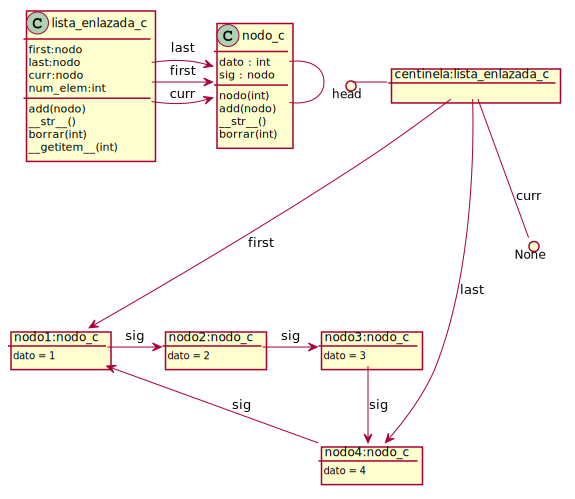

In [26]:
%%plantuml

@startuml 
class lista_enlazada_c{
    first:nodo
    last:nodo
    curr:nodo
    num_elem:int
    
    add(nodo)
    __str__()
    borrar(int)
    __getitem__(int)
}
class nodo_c{
    dato : int
    sig : nodo
    
    nodo(int)
    add(nodo)
    __str__()
    borrar(int)
}

nodo_c -- nodo_c
lista_enlazada_c -> nodo_c: first
lista_enlazada_c -> nodo_c: last
lista_enlazada_c -> nodo_c: curr

object "centinela:lista_enlazada_c" as o0
object "nodo1:nodo_c" as o1
o1 : dato = 1
object "nodo2:nodo_c" as o2
o2 : dato = 2
object "nodo3:nodo_c" as o3
o3 : dato = 3
object "nodo4:nodo_c" as o4
o4 : dato = 4

head ()- o0
o0 ---> o1:first
o0 ---> o4:last
o0 --() None :curr
o1 -> o2:sig
o2 -> o3:sig
o3 --> o4:sig
o4 -> o1:sig

@enduml

## Tarea

Realice la implementación de la lista enlazada circular, tomando como base los ejemplos proporcionados.